# Import libraries 


In [1]:
import os 
import numpy as np
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import pearsonr
from sklearn.model_selection import KFold
%matplotlib inline



# load data 

In [2]:
data = pd.read_csv(r'data/house_data_complete.csv') 
print (data.shape) 


(21613, 21)


# clean data 

In [3]:
data.dropna(); 
#print(data) ;

data = data.drop( ["id","date","zipcode", "sqft_above","lat","long","sqft_living15","sqft_lot15"] , axis =1  )


data = data.drop(data[data.bedrooms > 10].index)    
data = data.drop(data[data.bathrooms > 6].index)   
data = data.drop(data[data.sqft_living > 9000].index) 
data = data.drop(data[data.sqft_lot >150000].index)   
data = data.drop(data[data.grade <2].index)   
data = data.drop(data[data.sqft_basement >4000].index)   

print(data.shape)


(21267, 13)


# data  to array 

In [4]:
array = data.to_numpy()
print(array.shape)

(21267, 13)


# plot data 


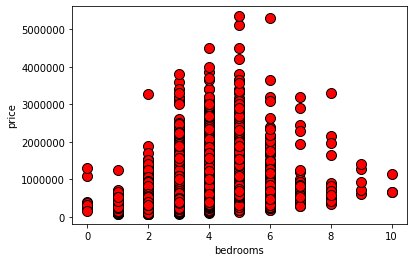

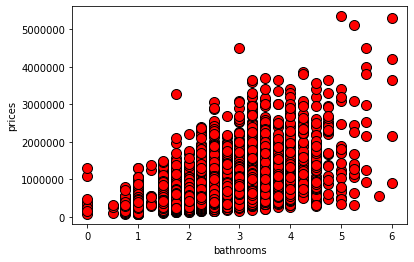

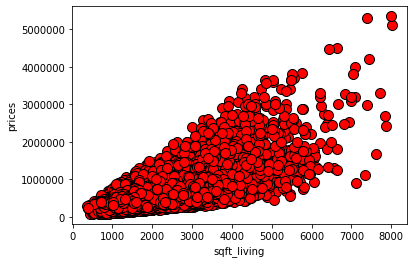

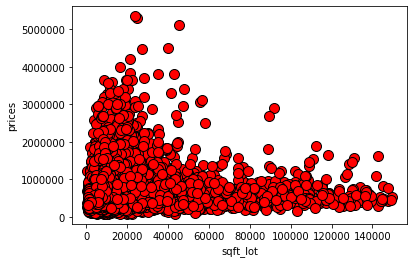

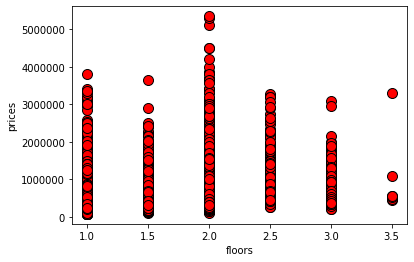

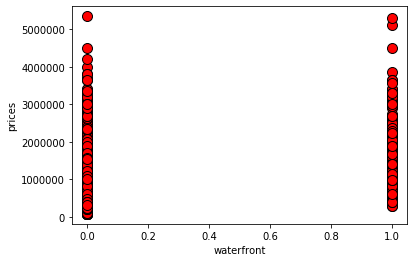

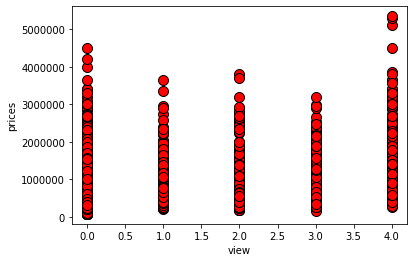

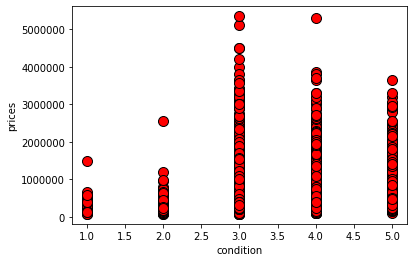

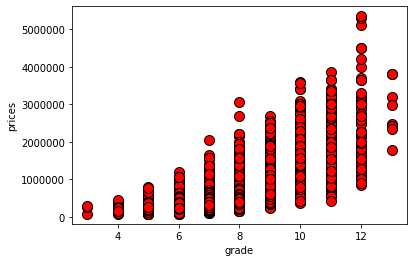

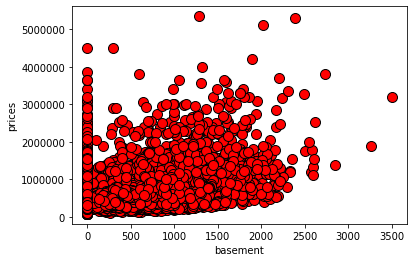

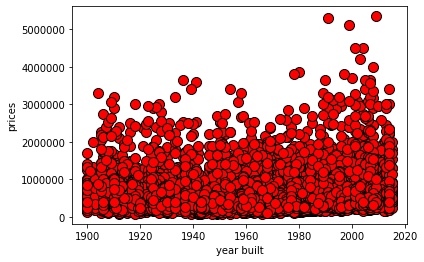

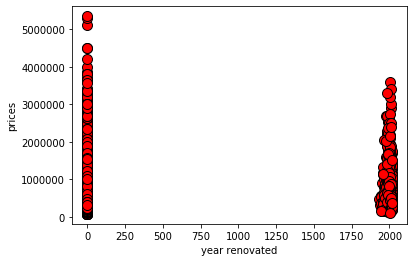

In [5]:
def plotData(x, y ,xlabel , ylabel):
    
    fig = pyplot.figure()  
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel(ylabel )
    pyplot.xlabel(xlabel)
    
prices = array[:,0]   
bedrooms = array[:,1]
plotData(bedrooms, prices,"bedrooms" , "price")

prices = array[:,0]   
bathrooms= array[:,2]
plotData(bathrooms, prices , "bathrooms"  ,"prices")  
    
prices = array[:,0]   
sqft_living = array[:,3]
plotData(sqft_living , prices ,"sqft_living" ,"prices")
 
prices = array[:,0]   
sqft_lot= array[:,4]
plotData(sqft_lot, prices, "sqft_lot" , "prices")

prices = array[:,0]   
floors= array[:,5]
plotData(floors, prices , "floors"  ,"prices")

prices = array[:,0]   
waterfront= array[:,6]
plotData(waterfront, prices , "waterfront"  ,"prices")

prices = array[:,0]   
view= array[:,7]
plotData(view, prices , "view"  ,"prices")

prices = array[:,0]   
condition= array[:,8]
plotData(condition, prices , "condition"  ,"prices")

prices = array[:,0]   
grade= array[:,9]
plotData(grade, prices , "grade"  ,"prices")

prices = array[:,0]   
sqft_basement= array[:,10]
plotData(sqft_basement, prices , "basement"  ,"prices")

prices = array[:,0]   
yr_built= array[:,11]
plotData(yr_built, prices , "year built"  ,"prices")

prices = array[:,0]   
yr_renovated= array[:,12]
plotData(yr_renovated ,prices , "year renovated"  ,"prices" )




# Divide to training, cross validation and testing 


In [6]:
y= array[:,0]      #price
X = array[:,1:]    #The rest of the array

print(X)
print(X.shape)
print(y)
print(y.shape) 

Xtrain,Xtesting,Ytrain,Ytesting = train_test_split(X,y,test_size = 0.3)  #70% Training,30% Testing 
Xvalidation,Xtest,Yvalidation,Ytest = train_test_split(Xtesting,Ytesting,test_size = 0.333333333333,shuffle = True) 

print(Xtrain.shape,Ytrain.shape)
print(Xvalidation.shape,Yvalidation.shape)
print(Xtest.shape,Ytest.shape)


[[3.000e+00 1.000e+00 1.180e+03 ... 0.000e+00 1.955e+03 0.000e+00]
 [3.000e+00 2.250e+00 2.570e+03 ... 4.000e+02 1.951e+03 1.991e+03]
 [2.000e+00 1.000e+00 7.700e+02 ... 0.000e+00 1.933e+03 0.000e+00]
 ...
 [2.000e+00 7.500e-01 1.020e+03 ... 0.000e+00 2.009e+03 0.000e+00]
 [3.000e+00 2.500e+00 1.600e+03 ... 0.000e+00 2.004e+03 0.000e+00]
 [2.000e+00 7.500e-01 1.020e+03 ... 0.000e+00 2.008e+03 0.000e+00]]
(21267, 12)
[221900. 538000. 180000. ... 402101. 400000. 325000.]
(21267,)
(14886, 12) (14886,)
(4254, 12) (4254,)
(2127, 12) (2127,)


# Normalize and add intercept for Training, validation and Testing


In [7]:
def  featureNormalize(X):

    X_norm = X.copy()
    
    mu = np.zeros(X.shape[0])
    sigma = np.zeros(X.shape[0])
    
    mu = np.mean(X,axis=0) #take rows 
    sigma  = np.std(X,axis = 0)  
    
    X_norm = (X - mu) / sigma 
       
    return X_norm, mu, sigma


Xtrainnorm,mu,sigma = featureNormalize(Xtrain)
Xtestnorm = (Xtest - mu)/sigma
Xvalidnorm = (Xvalidation - mu)/sigma

print(Xtrainnorm.shape,Ytrain.shape)
print(Xtestnorm.shape,Ytest.shape)
print(Xvalidnorm.shape,Yvalidation.shape)


#After the featureNormalize function, we now add the intercept term to X_norm (training, cross-validation and testing)

Xtrainnorm = np.concatenate([np.ones((Ytrain.size, 1)), Xtrainnorm], axis=1)
Xtestnorm = np.concatenate([np.ones((Ytest.size, 1)), Xtestnorm], axis=1)
Xvalidnorm = np.concatenate([np.ones((Yvalidation.size, 1)), Xvalidnorm], axis=1)

print(Xtrainnorm.shape,Ytrain.shape)
print(Xvalidnorm.shape,Yvalidation.shape)
print(Xtestnorm.shape,Ytest.shape)

(14886, 12) (14886,)
(2127, 12) (2127,)
(4254, 12) (4254,)
(14886, 13) (14886,)
(4254, 13) (4254,)
(2127, 13) (2127,)


# Cost function 


In [8]:
def computeCostMulti(X, y, theta):
    
    m = y.shape[0] # number of training examples
    
    J = 0
    
    h = np.dot(X,theta)
    diff = h - y  
    J = (1/(2*m)) * np.dot(diff, diff.T)
    
    return J

# Gradient Descent

In [9]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
   
    m = y.shape[0]  
    theta = theta.copy() # make a copy of theta, which will be updated by gradient descent
    J_history = []
    
    for i in range(num_iters):

        h = np.dot(X,theta.T)
        diff = np.dot ((h - y) , X) 
        theta = theta - (alpha/m) * diff 
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

# Regularization 


For cost function and Gradient Descent 


In [10]:
def costFunctionReg(theta, X, y, lambda_,alpha,numiterations):

    m = y.size  
    J = 0
    grad = np.zeros(theta.shape)
    
    h = np.dot(X,theta)
    temp = theta
    temp[0] = 0
    

    Jtemp = (1/(2*m)) * np.dot(np.transpose(np.dot(X,theta)-y),np.dot(X,theta)-y) 
    J = Jtemp + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    
    for i in range(num_iters):
        hypothesis= np.dot(X,temp)
        temp=temp*(1-(alpha*lambda_/m))-((alpha/m)*(np.dot(hypothesis-y,X)))
        
    
    return J, temp

# First Hypothesis 
   Linear Regression 

theta computed from gradient descent: [532411.10204219 -34218.26204407  29735.36348337 146129.05268952
 -18505.74130852  11533.03643902  48919.69429863  31864.62287894
  14744.54249408 147756.46964755   1504.05331409 -99458.13620145
   4496.93505086]


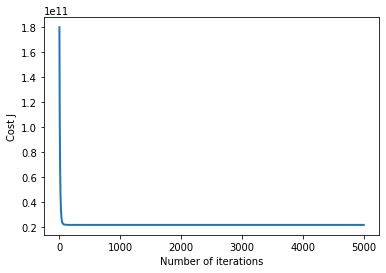

In [11]:
# Choose some alpha value 
alphaforH1= 0.05
num_iters = 5000

# init theta and run gradient descent
thetaforH1 = np.zeros(13)
thetaforH1, J_history = gradientDescentMulti(Xtrainnorm, Ytrain, thetaforH1, alphaforH1, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(thetaforH1)))

Correlation

In [12]:
ytrainh1 = np.dot(Xtrainnorm,thetaforH1)
corrh1train,_= pearsonr(Ytrain, ytrainh1)
print( corrh1train)

yvalidh1 = np.dot(Xvalidnorm,thetaforH1)
corrh1valid,_ = pearsonr(Yvalidation, yvalidh1)
print(corrh1valid)

ytesth1 = np.dot(Xtestnorm,thetaforH1)
corrh1test,_ = pearsonr(Ytest, ytesth1)
print(corrh1test)

0.805637840170727
0.819981922923149
0.8108768148696546


# Regularization for H1

In [13]:
thetaforH1reg = np.zeros(13)
Jh1reg, thetaforH1reg =  costFunctionReg(thetaforH1reg, Xtrainnorm, Ytrain, 10 ,0.01 ,10000)

print('theta using regularization: {:s}'.format(str(thetaforH1reg)))


theta using regularization: [532053.68320354 -34091.15951556  29768.13088372 145852.53183959
 -18436.55239901  11575.05942179  48890.69049771  31909.8165662
  14758.8452556  147679.72378844   1598.93441613 -99302.96673979
   4530.86234409]


Correlation 

In [14]:
ytrainh1reg = np.dot(Xtrainnorm,thetaforH1reg)
corrh1trainreg,_ = pearsonr(Ytrain, ytrainh1reg)
print(corrh1trainreg)

yvalidh1reg = np.dot(Xvalidnorm,thetaforH1reg)
corrh1validreg,_ = pearsonr(Yvalidation, yvalidh1reg)
print(corrh1validreg)

ytesth1reg= np.dot(Xtestnorm,thetaforH1reg)
corrh1testreg,_ = pearsonr(Ytest, ytesth1reg)
print(corrh1testreg)



0.8056376958539628
0.8199850249211671
0.810873989787827


Test for H1

In [15]:
print(Ytrain)

[ 249000.  464000. 1810000. ...  349950.  380000.  596500.]


In [16]:
print(ytrainh1)

[ 478890.79460441  541305.17787092 1020419.20986634 ...  420593.39369527
  466249.77621972  449695.2412261 ]


In [17]:
print(ytrainh1reg)

[ 478334.45735552  541042.75125581 1019452.34154154 ...  420233.3417536
  465740.94868175  449518.61206324]


# Second Hypothesis


In [18]:
def h2(X):
    x = np.zeros((X.shape[0],4))
    x[:,0] = X[:,0]                   #bedrooms
    x[:,1] = X[:,1]                   #bathrooms 
    x[:,2] = np.square(X[:,2])        #living
    x[:,3] = X[:,3]*X[:,4]            #lot , floors
    return x 

# h2 = theta0 + bedrooms theta1 + bathrooms theta2 + livingsquared theta3 + lot * floors theta4 

In [19]:
Xtrainh2 = h2(Xtrain) 
Xvalidh2 = h2(Xvalidation)
Xtesth2 = h2(Xtest)


Normalize and add intercept term

In [20]:
Xtrainh2 ,mu2,sigma2 = featureNormalize(Xtrainh2)
Xvalidnormh2 = (Xvalidh2 - mu2)/sigma2
Xtestnormh2 = (Xtesth2 - mu2)/sigma2

Xtrainh2 = np.concatenate([np.ones((Ytrain.size, 1)), Xtrainh2], axis=1)
Xvalidnormh2 = np.concatenate([np.ones((Yvalidation.size, 1)), Xvalidnormh2], axis=1)
Xtestnormh2 = np.concatenate([np.ones((Ytest.size, 1)), Xtestnormh2], axis=1)

theta computed from gradient descent: [532411.10204218 -34972.91060794  23090.3843559  263448.50366528
 -22413.09628401]


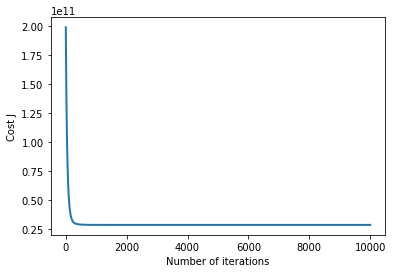

In [21]:
thetah2 = np.zeros(5)
thetah2, J_historyh2 = gradientDescentMulti(Xtrainh2, Ytrain, thetah2, 0.01, 10000)

pyplot.plot(np.arange(len(J_historyh2)), J_historyh2, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

print('theta computed from gradient descent: {:s}'.format(str(thetah2)))

Correlation 



In [22]:
yh2train = np.dot(Xtrainh2,thetah2)
corrh2train,_ = pearsonr(Ytrain, yh2train)
print('correlation h2 Training data : %.3f' % corrh2train)

# Validation data correlation
yh2valid = np.dot(Xvalidnormh2,thetah2)
corrh2valid,_ = pearsonr(Yvalidation, yh2valid)
print('correlation h2 validation data : %.3f' % corrh2valid)

yh2test = np.dot(Xtestnormh2,thetah2)
corrh2test,_ = pearsonr(Ytest, yh2test)
print('correlation h2 test data : %.3f' % corrh2test)


correlation h2 Training data : 0.730
correlation h2 validation data : 0.744
correlation h2 test data : 0.719


# Third hypothesis

In [23]:
def h3(X):
    x = np.zeros((X.shape[0],3))
    x[:,0] = np.square(X[:,2])  * 2                    #living
    x[:,1] = X[:,3] *4* X[:,8]                         # lot and grade
    x[:,2] = X[:,10]                                    #year built
    return x 

#h3 = theta0 + 2livingsquared theta 1 +lot* 4 grade theta 2  + year built theta 3 

In [24]:
Xtrainh3 = h3(Xtrain) 
Xvalidh3 = h3(Xvalidation)
Xtesth3 = h3(Xtest)

Xtrainh3 ,mu3,sigma3 = featureNormalize(Xtrainh3)
Xvalidnormh3 = (Xvalidh3 - mu3)/sigma3
Xtestnormh3 = (Xtesth3 - mu3)/sigma3

Xtrainh3 = np.concatenate([np.ones((Ytrain.size, 1)), Xtrainh3], axis=1)
Xvalidnormh3 = np.concatenate([np.ones((Yvalidation.size, 1)), Xvalidnormh3], axis=1)
Xtestnormh3 = np.concatenate([np.ones((Ytest.size, 1)), Xtestnormh3], axis=1)

theta computed from gradient descent: [532411.10204219 274177.93674154 -15840.33729156 -55553.34131348]


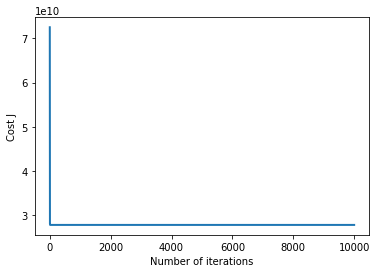

In [25]:
thetah3 = np.zeros(4)
thetah3, J_historyh3 = gradientDescentMulti(Xtrainh3, Ytrain, thetah3, 0.5, 10000)

pyplot.plot(np.arange(len(J_historyh3)), J_historyh3, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

print('theta computed from gradient descent: {:s}'.format(str(thetah3)))

In [26]:
yh3train = np.dot(Xtrainh3,thetah3)
corrh3train,_ = pearsonr(Ytrain, yh3train)
print('correlation h3 Training data : %.3f' % corrh3train)

# Validation data correlation
yh3valid = np.dot(Xvalidnormh3,thetah3)
corrh3valid,_ = pearsonr(Yvalidation, yh3valid)
print('correlation h3 validation data : %.3f' % corrh3valid)

yh3test = np.dot(Xtestnormh3,thetah3)
corrh3test,_ = pearsonr(Ytest, yh3test)
print('correlation h3 test data : %.3f' % corrh3test)


correlation h3 Training data : 0.740
correlation h3 validation data : 0.754
correlation h3 test data : 0.730


# kfold

In [27]:
kf = KFold(n_splits=15, shuffle=False, random_state=None)

i=0 
for train_index, test_index in kf.split(X):
    Xtrainnorm, Xtestnorm = X[train_index], X[test_index]
    Ytrain, Ytest = y[train_index], y[test_index]
   
    #normalize and add intercepts 
    Xtrainnorm,mu,sigma = featureNormalize(Xtrainnorm)   
    Xtrainnorm = np.concatenate([np.ones((Ytrain.size, 1)), Xtrainnorm], axis=1)
    #print(Xtrainnorm.shape)
    
    Xtestnorm = (Xtestnorm -mu) /sigma
    Xtestnorm = np.concatenate([np.ones((Ytest.size, 1)), Xtestnorm], axis=1)
    #print(Xtestnorm.shape)

    thetaforH1, J_history = gradientDescentMulti(Xtrainnorm, Ytrain, thetaforH1, alphaforH1, num_iters)
    
    ytrainh1 = np.dot(Xtrainnorm,thetaforH1)
    corrh1train,_= pearsonr(Ytrain, ytrainh1)
    print(i)
    print('Training corr: %.3f' % corrh1train)
    
    ytesth1 = np.dot(Xtestnorm,thetaforH1)
    corrh1test,_ = pearsonr(Ytest, ytesth1)
    print('Test corr: %.3f' % corrh1test)
    
    
    i +=1
    
    
    
    

0
Training corr: 0.809
Test corr: 0.805
1
Training corr: 0.808
Test corr: 0.827
2
Training corr: 0.809
Test corr: 0.810
3
Training corr: 0.810
Test corr: 0.798
4
Training corr: 0.808
Test corr: 0.826
5
Training corr: 0.810
Test corr: 0.794
6
Training corr: 0.810
Test corr: 0.803
7
Training corr: 0.809
Test corr: 0.818
8
Training corr: 0.810
Test corr: 0.801
9
Training corr: 0.809
Test corr: 0.808
10
Training corr: 0.808
Test corr: 0.828
11
Training corr: 0.810
Test corr: 0.801
12
Training corr: 0.809
Test corr: 0.813
13
Training corr: 0.810
Test corr: 0.800
14
Training corr: 0.810
Test corr: 0.806
